Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что проект хорошо структурирован. Приятно проверять такие работы.
* К сожалению, над проектом нужно будет еще немного поработать. Однако, правки не должны занять много времени.
* В работе ты сможешь найти несколько советов. Буду рад, если ты обратишь на них внимание.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После правок проект может быть зачтен.
* Радует, что ты обратил внимание еще и на советы.
* Отмечу, что исходные размеры у изображений разные. Они стали равны из-за параметра target_size в train_datagen.
* Удачи в дальнейшем обучении и следующих работах!

# 1. Исследовательский анализ данных

In [5]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [7]:
labels.head()
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


<div class="alert alert-block alert-info">
<b>Совет: </b> Не забывай про методы первичного анализа (head и info), которые нужно использовать после загрузки файла.
</div>

Text(0, 0.5, 'amount(количество)')

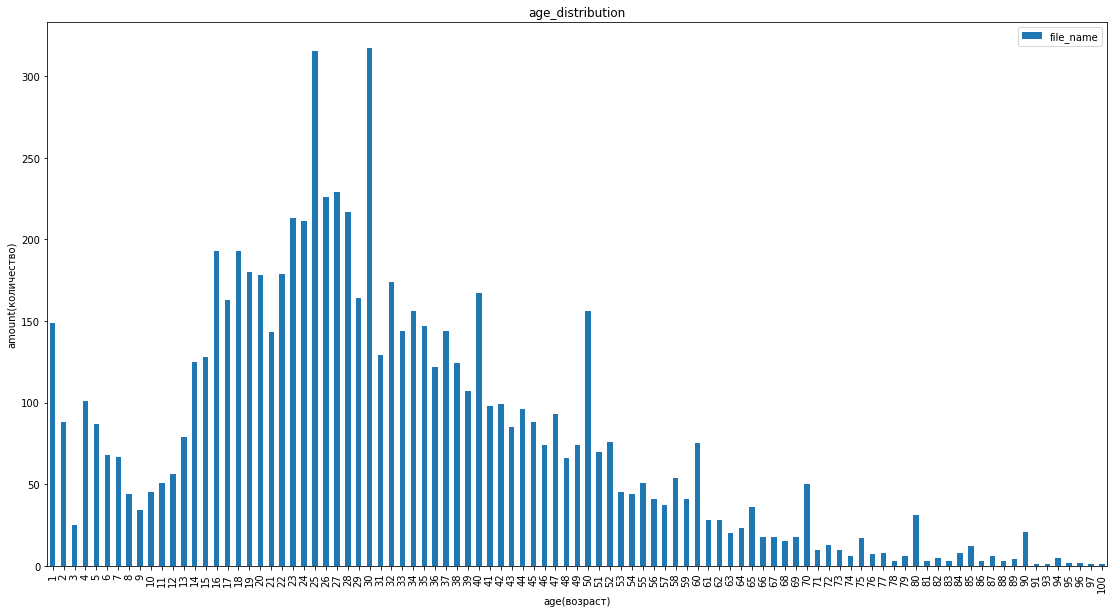

In [11]:
age_distribution=labels.pivot_table(index=['real_age'],values='file_name', aggfunc='count').plot.bar(figsize=(19,10))
plt.title("age_distribution")
plt.xlabel("age(возраст)")
plt.ylabel("amount(количество)")  

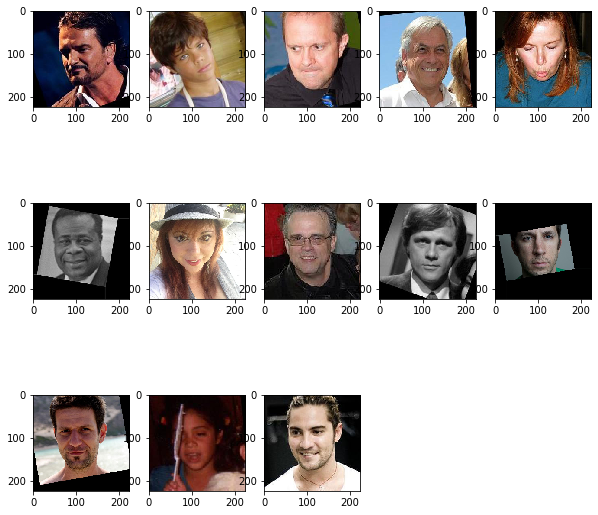

In [12]:
features,target=next(train_gen_flow)
fig=plt.figure(figsize=(10,10))
for i in range(13):
    fig.add_subplot(3,5,i+1)
    plt.imshow(features[i])

**По графику распределения возраста можно сказать:**
- преобладают люди от 16 до 40 лет
- после 60 наблюдается снижение количества людей по сравнению с другими возрастами
- достаточно большая база в которой есть люди любого возраста

**По выведеным на экран изображениям можно сделать следющие выводы:**
- Изображения одного размера
- Есть как цветные так и черно белые варинты
- Наблюдается разная яркость и контрастность на них
- Лица примерно одного размера и находятся по центру, местами немного повернуты для правильного/ровного расположения в рамке

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> 
    
* Проведи анализ гистограммы: каких возрастов много, каких мало.
* Опиши изображения: их размер, поворот, цвет.
    
</div>


<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно поработать над оформление графика (название осей и самого графика, а также размер). В названиях (title) изображений можно указать возраст.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения:
    
        - Применен метод первичного анализа (head и info).
    
        - Оформлен распределения возраста.
    
        - Добавлены названия осей и изменен размер.
    
        - Добавлен вывод к выведенным изображениям и графику распределения возраста.
</div>

# 2. Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
 
def load_train(path):
 
    directory = path + '/final_files/'
    labels = pd.read_csv(path + '/labels.csv')
 
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        vertical_flip=True,
        validation_split=0.25)
 
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=directory,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
 
    return train_datagen_flow 
 
    
def load_test(path):
 
    directory = path + '/final_files/'
    labels = pd.read_csv(path + '/labels.csv')
 
    test_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25)
 
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=directory,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
 
    return test_datagen_flow 
 

def create_model(input_shape):
 
    optimizer = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
 
    model.compile(optimizer=optimizer, loss='mse',
                  metrics=['mae'])
 
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=3,
               steps_per_epoch=None, validation_steps=None):
 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data, validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
 
    return model

```

<div class="alert alert-block alert-success">
<b>Успех:</b> Модель определена корректно. Молодец, что применил аугментацию только на тренировочной выборке.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Вертикальный флип не имеет особого смысла использовать, так как фотографии полученные таким образом не похожи на настоящие.
</div>

```

2021-01-18 17:20:38.166189: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2021-01-18 17:20:38.168095: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2021-01-18 17:20:39.268536: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-18 17:20:39.950083: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2021-01-18 17:20:39.950148: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-18 17:20:39.950186: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-18 17:20:39.952033: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-01-18 17:20:39.952383: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2021-01-18 17:20:39.955054: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2021-01-18 17:20:39.956449: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2021-01-18 17:20:39.956510: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-01-18 17:20:39.960115: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2021-01-18 17:20:39.960518: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-01-18 17:20:39.968397: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1999990000 Hz
2021-01-18 17:20:39.968979: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5070c20 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-01-18 17:20:39.969006: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-01-18 17:20:40.100852: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x50f6c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-01-18 17:20:40.100891: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2021-01-18 17:20:40.103088: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-PCIE-32GB computeCapability: 7.0
coreClock: 1.38GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2021-01-18 17:20:40.103144: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-18 17:20:40.103157: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-18 17:20:40.103181: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-01-18 17:20:40.103213: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2021-01-18 17:20:40.103226: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2021-01-18 17:20:40.103237: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2021-01-18 17:20:40.103247: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-01-18 17:20:40.107289: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2021-01-18 17:20:40.107345: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-18 17:20:40.446396: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-01-18 17:20:40.446445: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2021-01-18 17:20:40.446455: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2021-01-18 17:20:40.450316: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30509 MB memory) -> physical GPU (device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/3
2021-01-18 17:20:53.965273: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-18 17:20:54.296338: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 52s - loss: 231.3228 - mae: 11.2202 - val_loss: 508.3693 - val_mae: 17.3645
Epoch 2/3
356/356 - 42s - loss: 114.6937 - mae: 8.1236 - val_loss: 131.1239 - val_mae: 8.8821
Epoch 3/3
356/356 - 42s - loss: 88.1536 - mae: 7.1641 - val_loss: 91.0656 - val_mae: 7.1703
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 91.0656 - mae: 7.1703
Test MAE: 7.1703

```

# 3. Анализ обученной модели

В результе проделанной работы обучили нейронную сеть и рассчитали качество MAE: 7.1703.
Получили неплохой результат и теперь данная модель поможет анализировать покупки и предлагать товары, которые могут заинтересовать покупателей различных возрастных групп.
Для данной модели были применена архитектура ResNet50 и подобраны параметры аугментации horizontal_flip,vertical_flip.
Улучшить полученную модель можно подбором других параметров аугметации(как вариант исключить вертикальный флип), поменять learning rate и количество эпох.

<div class="alert alert-block alert-info">
<b>Совет: </b> В анализе можно было подробнее сказать о конфигурации сети и предложить способы улучшения качества в будущем.
</div>

# Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы